# EDA ON SHOE DATASET

# Performed by: Piyush Borhade 

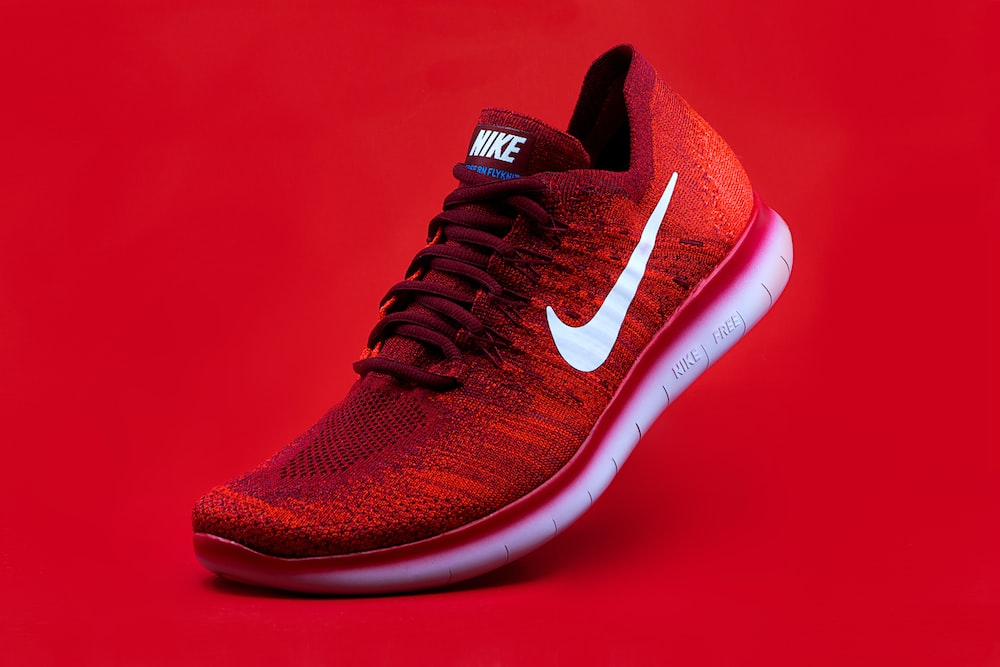

# About the dataset!

**This dataset has 23940 rows and has 5 columns listed as below:**

In [ ]:
# Importing the libraries we will be requiring!

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('MEN_SHOES.csv')
df

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING
0,ASIAN,"2,242","₹1,098","Oxygen-01 Sports Running,Walking & Gym Shoes w...",3.8
1,ASIAN,240,₹674,"Men's Express-08 Sports Running,Walking,Gym,Tr...",4.0
2,ASIAN,"16,662",₹588,"Men's Cosko Sports Running,Walking,Gym,Trainin...",3.8
3,ASIAN,135,₹599,"Wind-03 Sports Running,Walking & Gym Shoes wit...",4.0
4,Reebok,240,₹982,Men's Velocity Runner Lp Running Shoe,4.0
...,...,...,...,...,...
23935,Campus,198,₹623,Men's HARVEL PRO Running Shoes,4.0
23936,Wakefield,49,₹399,Stylish Running Sports Shoes for MEN-2010,3.4
23937,URJO,557,₹839,Mens Running Shoes,4.2
23938,FEETEES,63,₹349,Nexon Men's Casual Eva Socks Knitted Running S...,3.6


In [3]:
df.shape

(23940, 5)

In [4]:
df.columns

Index(['Brand_Name', 'How_Many_Sold', 'Current_Price', 'Product_details',
       'RATING'],
      dtype='object')

For simplicity, we are renaming columns! 

In [21]:
df.rename(columns={'Brand_Name':'Name',
                  'How_Many_Sold':'Sold',
                   'Product_details':'Details',
                   'RATING':'Rating'},inplace=True)

In [22]:
df.describe()

,Rating
count,23940.000000
mean,3.836667
std,0.410686
min,2.400000
25%,3.600000
50%,4.000000
75%,4.000000
max,4.600000


**Let's get an overview of features datatype**

In [23]:
df.dtypes

Name              object
Sold              object
Current_Price     object
Details           object
Rating           float64
dtype: object

We can observe that Rating is just in float while other columns are in object

**We need to check the Null Values**

In [24]:
df.isnull().sum()

Name               0
Sold               0
Current_Price    798
Details            0
Rating             0
dtype: int64

**We need to handle null values which are present in 'Current_price'**

In [25]:
df['Current_Price'].isnull().sum()

798

In [34]:
df.dropna(inplace=True)

In [35]:
df.isnull().sum()

Name             0
Sold             0
Current_Price    0
Details          0
Rating           0
dtype: int64

 **We are having no null values**

In [26]:
df['Name'].value_counts()

ASIAN           4788
Campus          4788
Sparx           2793
Reebok          1995
BATA            1197
Adidas          1197
Generic         1197
Kraasa           798
road runner      399
Corstyle         399
D Shoes          399
Axter            399
Centrino         399
Puma             399
Robbie jones     399
Bourge           399
Nivia            399
Wakefield        399
URJO             399
FEETEES          399
FURO             399
Name: Name, dtype: int64

In [27]:
df['Rating'].value_counts()

4.0    8778
4.2    3990
3.8    3591
3.6    2793
3.4    1197
3.0     798
4.4     798
2.8     798
4.6     399
2.4     399
3.2     399
Name: Rating, dtype: int64

In [28]:
df['Current_Price'].value_counts()

₹1,282    1197
₹499      1197
₹674       798
₹298       798
₹900       798
₹1,399     798
₹799       798
₹399       798
₹1,098     399
₹899       399
₹759       399
₹1,231     399
₹849       399
₹901       399
₹779       399
₹699       399
₹1,485     399
₹698       399
₹2,159     399
₹855       399
₹598       399
₹1,173     399
₹2,008     399
₹623       399
₹839       399
₹349       399
₹231       399
₹637       399
₹532       399
₹774       399
₹588       399
₹599       399
₹982       399
₹498       399
₹880       399
₹439       399
₹1,005     399
₹780       399
₹579       399
₹702       399
₹1,279     399
₹1,199     399
₹649       399
₹524       399
₹590       399
₹722       399
₹1,080     399
₹1,299     399
Name: Current_Price, dtype: int64

In [29]:
df['Sold'].value_counts()

240       1197
112        798
1,685      399
277        399
350        399
682        399
3,532      399
1,072      399
658        399
812        399
317        399
307        399
3,448      399
5,690      399
2,242      399
4,992      399
998        399
165        399
83         399
206        399
954        399
860        399
102        399
116        399
198        399
49         399
557        399
63         399
18,747     399
392        399
843        399
245        399
16,662     399
135        399
455        399
72,611     399
84         399
1,795      399
309        399
2,144      399
12         399
421        399
7          399
60         399
38,839     399
173        399
1,490      399
6,159      399
7,712      399
4,583      399
706        399
146        399
1,060      399
2,076      399
382        399
216        399
2          399
Name: Sold, dtype: int64

**We observed that their is ',' in both columns i.e 'Sold' and 'Current_Price' and we need to remove the '$' sign from 'Current_Price'**

In [38]:
df['Sold'] = df['Sold'].str.replace(',', '')

In [39]:
df['Current_Price'] = df['Current_Price'].str.replace(',', '')

In [40]:
df['Current_Price'] = df['Current_Price'].str.replace('₹', '')

**The special characters is removed from 'Current Price'**

**We need to convert the string datatype into int datatype of "Current_price" and "Sold" features**

In [42]:
df['Sold'] = df['Sold'].astype(int)

In [43]:
df['Current_Price'] = pd.to_numeric(df['Current_Price'], errors='coerce').apply(np.floor).astype('Int64')

In [44]:
df.describe()

,Sold,Current_Price,Rating
count,23142.000000,23142.000000,23142.00000
mean,3607.896552,842.258621,3.82069
std,10896.836132,387.523381,0.40462
min,2.000000,231.000000,2.40000
25%,173.000000,588.000000,3.60000
50%,406.500000,776.500000,4.00000
75%,1795.000000,1080.000000,4.00000
max,72611.000000,2159.000000,4.40000


In [45]:
df.corr()

,Sold,Current_Price,Rating
Sold,1.000000,-0.155577,0.144131
Current_Price,-0.155577,1.000000,0.469463
Rating,0.144131,0.469463,1.000000


In [47]:
cm = df.corr()

<AxesSubplot:>

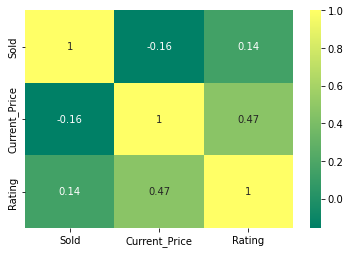

In [49]:
sns.heatmap(cm, cmap='summer',annot=True)

**We can visualize that 'Current_Price' and 'Rating' are correlated with each other by around 47%**

**While the least correlation is just 14% which is in between 'Sold' and 'Rating' features**

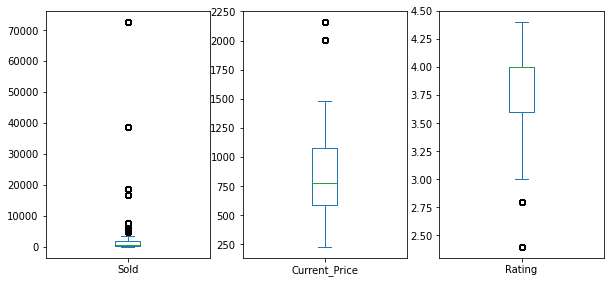

In [59]:
df.plot(kind='box',subplots=True , layout = (2,3),sharex = False,figsize=(10,10))
plt.show()

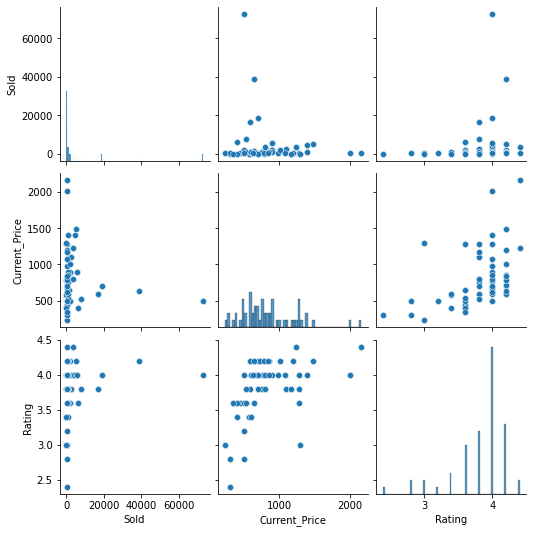

In [60]:
sns.pairplot(df)

### Question 1: Which 10 brand are most popular??

In [66]:
most_popular_brand = df.groupby('Name')[['Sold']].sum().reset_index()
most_popular_brand

,Name,Sold
0,ASIAN,41238645
1,Adidas,2120286
2,Axter,139650
3,BATA,2372055
4,Bourge,7480053
5,Campus,5950287
6,Centrino,272118
7,Corstyle,2793
8,D Shoes,594510
9,FEETEES,25137


In [67]:
top10 = most_popular_brand.head(10)

In [68]:
fig = px.bar(top10, x='Name', y='Sold',title = "Most Popular Brand")
fig.show()

**Answer:**  We can observe that **ASIAN** is the most sold brand with more than 40M copies sold!
Over 7.4M sold with brands like **Bourge** and slightly less than 5.95M were **Campux** and **Adidas** with 2.12M of sale
        

### Question 2: Which Brand has max rating??

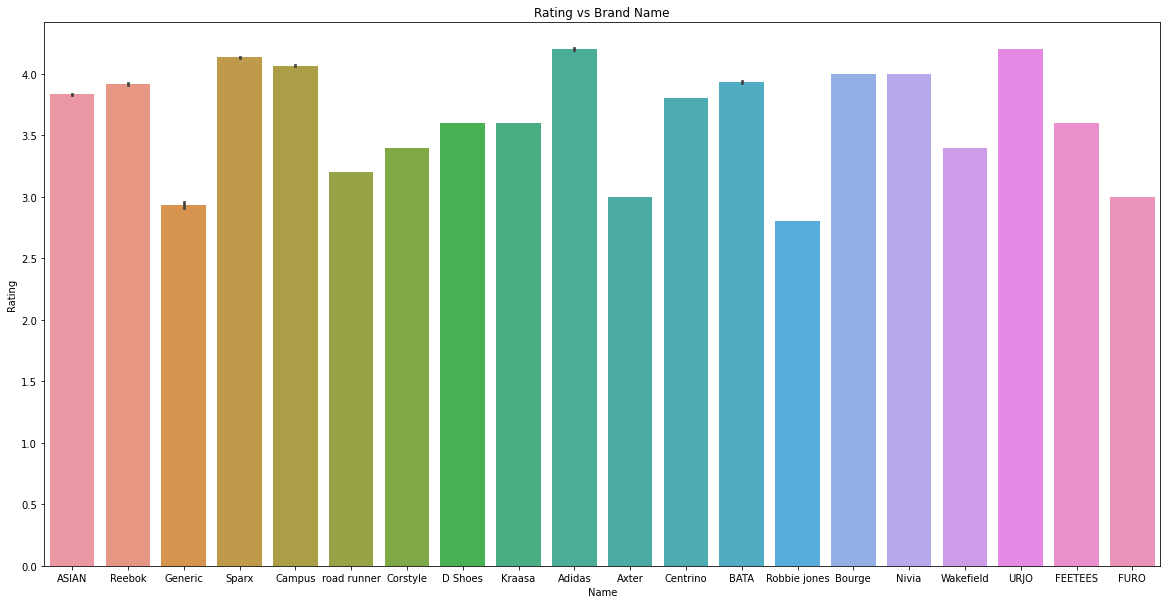

In [73]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'Name',
            y = 'Rating',            
            data = df).set(title = "Rating vs Brand Name");
plt.show()

We can see that **Spark, Adidas, URJO** has most rating but we cannot classify which brand among these three is having most rating.

In [79]:
max_rating = df['Rating'].max()

In [80]:
brand_max_rating= df.loc[df['Rating'] == df['Rating'].max(), 'Name'].iloc[0]

print(brand_max_rating,'has maximum rating of', max_rating)

Sparx has maximum rating of 4.4


**Answer:** We had created a function to optimise which brand is having most rating. 
We saw that **Spark is having maximum rating of 4.4**

### Question 3: Which Brand has sold maximum shoes! 

In [83]:
max_shoes_sold = df['Sold'].max()
max_shoes_sold

72611

In [84]:
max_sold_brand = df.loc[df['Sold'] ==  max_shoes_sold]
max_sold_brand

,Name,Sold,Current_Price,Details,Rating
6,ASIAN,72611,498,Men's Wonder-13 Sports Running Shoes,4.0
66,ASIAN,72611,498,Men's Wonder-13 Sports Running Shoes,4.0
126,ASIAN,72611,498,Men's Wonder-13 Sports Running Shoes,4.0
186,ASIAN,72611,498,Men's Wonder-13 Sports Running Shoes,4.0
246,ASIAN,72611,498,Men's Wonder-13 Sports Running Shoes,4.0
...,...,...,...,...,...
23646,ASIAN,72611,498,Men's Wonder-13 Sports Running Shoes,4.0
23706,ASIAN,72611,498,Men's Wonder-13 Sports Running Shoes,4.0
23766,ASIAN,72611,498,Men's Wonder-13 Sports Running Shoes,4.0
23826,ASIAN,72611,498,Men's Wonder-13 Sports Running Shoes,4.0


**Answer:** We can clearly see that **ASIAN** brand has sold the most shoes around **72611** 

### Question 4: Top 10 product with max current price

In [93]:
top_10_product_price = df.groupby('Details')[['Current_Price']].max().sort_values('Current_Price',ascending=False).head(10).reset_index()

In [94]:
top_10_product_price 

,Details,Current_Price
0,Men's Skadi Shoes,2159
1,Men's Turbo Glide M Leather Running Shoe,2008
2,Men's Yking 2.0 Running Shoes,1485
3,Mens First Running Shoe,1399
4,Men's Mike (N) Running Shoes,1399
5,Low Ankle Running Sports Shoes for Men (O-5033),1299
6,Men's Top Speed Xtreme Running Shoes,1282
7,Men's Stride Walker Walking Shoe,1282
8,Men's Jung 21 W Running Shoes,1282
9,Men SM-661 Sports Shoes,1279


In [95]:
fig = px.bar(top_10_product_price, x='Details', y='Current_Price',title = "Top 10 Product with Max Current Price")
fig.show()

### Question 5: Which is the most and least priced Product? 

In [96]:
max_shoes_price = df['Current_Price'].max()
max_shoes_price

2159

In [97]:
max_priced_product = df.loc[df['Current_Price'] ==  max_shoes_price]
max_priced_product

,Name,Sold,Current_Price,Details,Rating
50,Adidas,206,2159,Men's Skadi Shoes,4.4
110,Adidas,206,2159,Men's Skadi Shoes,4.4
170,Adidas,206,2159,Men's Skadi Shoes,4.4
230,Adidas,206,2159,Men's Skadi Shoes,4.4
290,Adidas,206,2159,Men's Skadi Shoes,4.4
...,...,...,...,...,...
23690,Adidas,206,2159,Men's Skadi Shoes,4.4
23750,Adidas,206,2159,Men's Skadi Shoes,4.4
23810,Adidas,206,2159,Men's Skadi Shoes,4.4
23870,Adidas,206,2159,Men's Skadi Shoes,4.4


In [98]:
least_shoes_price = df['Current_Price'].min()
least_shoes_price

231

In [101]:
least_priced_product = df.loc[df['Current_Price'] == least_shoes_price]
least_priced_product

,Name,Sold,Current_Price,Details,Rating
34,Axter,350,231,"Men-9064 Grey Top Best Rates,Sports Shoes,Runn...",3.0
94,Axter,350,231,"Men-9064 Grey Top Best Rates,Sports Shoes,Runn...",3.0
154,Axter,350,231,"Men-9064 Grey Top Best Rates,Sports Shoes,Runn...",3.0
214,Axter,350,231,"Men-9064 Grey Top Best Rates,Sports Shoes,Runn...",3.0
274,Axter,350,231,"Men-9064 Grey Top Best Rates,Sports Shoes,Runn...",3.0
...,...,...,...,...,...
23674,Axter,350,231,"Men-9064 Grey Top Best Rates,Sports Shoes,Runn...",3.0
23734,Axter,350,231,"Men-9064 Grey Top Best Rates,Sports Shoes,Runn...",3.0
23794,Axter,350,231,"Men-9064 Grey Top Best Rates,Sports Shoes,Runn...",3.0
23854,Axter,350,231,"Men-9064 Grey Top Best Rates,Sports Shoes,Runn...",3.0


**Answers:** the Most Priced Product is **Men's Skadi Shoes** and the Least Priced Product is **Men-9064 Grey Top Best Rates,Sports Shoes,Running**

### Question 6: Which Brand sells most costlier shoe?? 

In [109]:
max_shoes_price

2159

In [108]:
mx_shoe_cost = df.loc[df['Current_Price'] == max_shoes_price,'Name'].iloc[0]
mx_shoe_cost

'Adidas'

**Answer: Adidas have the most priced shoes at $2159**

### Question 7: Average Price of Each Brand ?

In [112]:
brand_avg_price = df.groupby('Name')[['Current_Price']].mean().reset_index()
brand_avg_price

,Name,Current_Price
0,ASIAN,699.75
1,Adidas,1884.0
2,Axter,231.0
3,BATA,832.333333
4,Bourge,699.0
5,Campus,897.916667
6,Centrino,759.0
7,Corstyle,579.0
8,D Shoes,649.0
9,FEETEES,349.0


In [113]:
fig = px.bar(brand_avg_price, x='Name', y='Current_Price',title = "Average Price of Each Brand")
fig.show()

**Ansers:  Average price of Adidas is around 1800, FURO is around 1200**

### Question 8: Average shoes price per brand

In [114]:
avg_shoes_price_per_brand = df.groupby('Name')[['Current_Price']].mean().sort_values('Current_Price',ascending = False).reset_index()

In [115]:
avg_shoes_price_per_brand

,Name,Current_Price
0,Adidas,1884.0
1,FURO,1299.0
2,Reebok,1166.6
3,Sparx,1012.5
4,Campus,897.916667
5,Nivia,855.0
6,URJO,839.0
7,BATA,832.333333
8,Centrino,759.0
9,ASIAN,699.75


### Question 9: Which Brand is sold the least shoes ?

In [116]:
least_shoes_sold = df['Sold'].min()
least_shoes_sold 

2

In [117]:
least_sold_brand = df.loc[df['Sold'] ==  least_shoes_sold]
least_sold_brand

,Name,Sold,Current_Price,Details,Rating
59,FURO,2,1299,Low Ankle Running Sports Shoes for Men (O-5033),3.0
119,FURO,2,1299,Low Ankle Running Sports Shoes for Men (O-5033),3.0
179,FURO,2,1299,Low Ankle Running Sports Shoes for Men (O-5033),3.0
239,FURO,2,1299,Low Ankle Running Sports Shoes for Men (O-5033),3.0
299,FURO,2,1299,Low Ankle Running Sports Shoes for Men (O-5033),3.0
...,...,...,...,...,...
23699,FURO,2,1299,Low Ankle Running Sports Shoes for Men (O-5033),3.0
23759,FURO,2,1299,Low Ankle Running Sports Shoes for Men (O-5033),3.0
23819,FURO,2,1299,Low Ankle Running Sports Shoes for Men (O-5033),3.0
23879,FURO,2,1299,Low Ankle Running Sports Shoes for Men (O-5033),3.0


**Answer: Furo sold the least number of shoe i.e 2**